# Data Gathering and Processing: Occurrence Data
This phase focuses on acquiring and processing species occurrence data for *Rana temporaria* (Common Frog), *Bufo bufo* (Common Toad), and the three native newts present in Scotland: *Lissotriton helveticus* (Palmate Newt), *Lissotriton vulgaris* (Smooth Newt), and *Triturus cristatus* (Great Crested Newt). The goal is to obtain high-resolution or presence/absence data for use in habitat suitability modeling, ecological network analysis, and ultimately in developing recommendations for Blue-Green Infrastructure (BGI) opportunities that enhance amphibian connectivity.

## 1. Importance of Occurrence and Presence/Absence Data
### 1.1 Occurrence Data:

**Definition**: This data represents the locations where a particular species has been observed or recorded. It usually includes geographic coordinates, dates, and other associated metadata.

**Use in This Study**: Occurrence data is a primary input for building habitat suitability models using species distribution modeling (SDM) approaches. These models predict the suitability of areas within the study region based on environmental predictors (more on environmental predictors in LINK TO NOTEBOOK). Occurrence data is also used in spatial analyses to identify ecological corridors and areas with connectivity potential for the species in focus.

### 1.2 Presence/Absence Data:

**Definition**: Presence/absence data indicates whether a species is present or not at particular locations within a defined grid or area. Unlike occurrence data, it also explicitly captures areas where the species was not found, providing a more robust basis for certain statistical modelling approaches.

**Use in This Study:** This data helps refine models by providing negative data points (absence data), which can improve the reliability and accuracy of habitat suitability models. Presence/absence data can aid in assessing the effectiveness of existing ecological networks and identifying areas that need enhancement or restoration through BGI.

## 2. Species Occurrence Retrieval
For this study, the primary data source is the **Global Biodiversity Information Facility (GBIF)**, a widely used open-access database for biodiversity data, including species occurrence records. Additional potential sources include:

* NBN Atlas (UK-based biodiversity data)
* Scottish Herpetology Atlas or any regional databases specific to amphibians
* Local Environmental Records Centres (LERCs): These can provide region-specific data that may not be captured in larger databases.
* Citizen Science Projects: Platforms such as iNaturalist may supplement occurrence data with public contributions.

Using APIs (e.g., `pygbif` for accessing GBIF) to query and retrieve occurrence records for each target species.
Extracting data that falls within the boundaries of the study area using spatial filtering.

### 2.1 Importing Required Libraries
Let's begin by importing essential libraries for data retrieval and geospatial analysis.

In [1]:
import pygbif  # For retrieving GBIF data
from pygbif import occurrences
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

INFO:NumExpr defaulting to 8 threads.


In the code above: 
* `pygbif` allows querying the Global Biodiversity Information Facility (GBIF) for species occurrence data.
* `pandas` is used for data manipulation and processing.
* `geopandas` facilitates geospatial operations, such as loading and filtering data based on a shapefile.

### 2.2 Loading the Study Area Shapefile
The study area shapefile helps spatially filter occurrences to ensure data relevance to the study region.

In [2]:
# Load study area shapefile
study_area = gpd.read_file('C:/GIS_Course/MScThesis-MaviSantarelli/data/StudyArea/Study_Area.shp')

# Ensure the Coordinate Reference System (CRS) is compatible (EPSG:4326 for latitude/longitude)
study_area = study_area.to_crs('EPSG:4326')
# Get bounding box coordinates (minx, miny, maxx, maxy)
minx, miny, maxx, maxy = study_area.total_bounds
print (study_area.total_bounds)

[-5.18742208 54.86206445 -2.20955055 56.48171437]


Explanation:

* The study area defines the geographic boundaries for filtering occurrence records.
* Using an appropriate `CRS` (coordinate reference system) ensures consistency during spatial operations.
* We are getting the `bounding box` defined by the minimum and maximum latitude/longitude values of our study area to use in the database query. 
  
### 2.3 Querying Species Occurrence Data from GBIF
   
We use `pygbif` to retrieve occurrence data for the target species:

In [3]:
# Create a WKT string representing a bounding box
geometry_filter = f"POLYGON(({minx} {miny}, {minx} {maxy}, {maxx} {maxy}, {maxx} {miny}, {minx} {miny}))"

# Define species of interest, including the Alpine Newt
species_list = [
    'Rana temporaria', 
    'Bufo bufo', 
    'Lissotriton helveticus', 
    'Lissotriton vulgaris', 
    'Triturus cristatus', 
    'Ichthyosaura alpestris'  # Alpine Newt
]
occurrences_data = []  # List to store occurrence records

for species in species_list:
    response = occurrences.search(
        scientificName=species,
        limit=10000,  # Set a limit for the number of records retrieved
        year='2020,2024',  # Filter for occurrences from 2020 to 2024
        geometry=geometry_filter  # Apply spatial filter as a bounding box
    )
    occurrences_data.extend(response['results'])

# Convert to a DataFrame for easier processing
df = pd.DataFrame(occurrences_data)
print(len(df))

1202


This code block retrieves and organizes species occurrence data for specific amphibian species within a specified geographic region and time frame.

#### Summary of Functionality:
* **Spatial Filtering**: A `bounding box` is defined using the coordinates of your study area and represented as a Well-Known Text (WKT) polygon string. This restricts the data retrieval to occurrences within this defined area.
* **Species Filtering**: The code targets occurrences for six amphibian species: *Rana temporaria* (Common Frog), *Bufo bufo* (Common Toad), *Lissotriton helveticus* (Palmate Newt), *Lissotriton vulgaris* (Smooth Newt), *Triturus cristatus* (Great Crested Newt) and the invasive *Ichthyosaura alpestris* (Alpine Newt).
* **Time Filtering**: Only data from the years 2020 to 2024 is retrieved.
* **Data Retrieval**: The code uses the `pygbif` library to query the Global Biodiversity Information Facility (GBIF) for up to 10,000 records per species that match these filters.
* **Data Processing**: The retrieved occurrence data is then stored in a list, which is converted into a `Pandas DataFrame` for further analysis or processing.

Before we proceed with data cleaning, it would be useful to look as some quick statics.

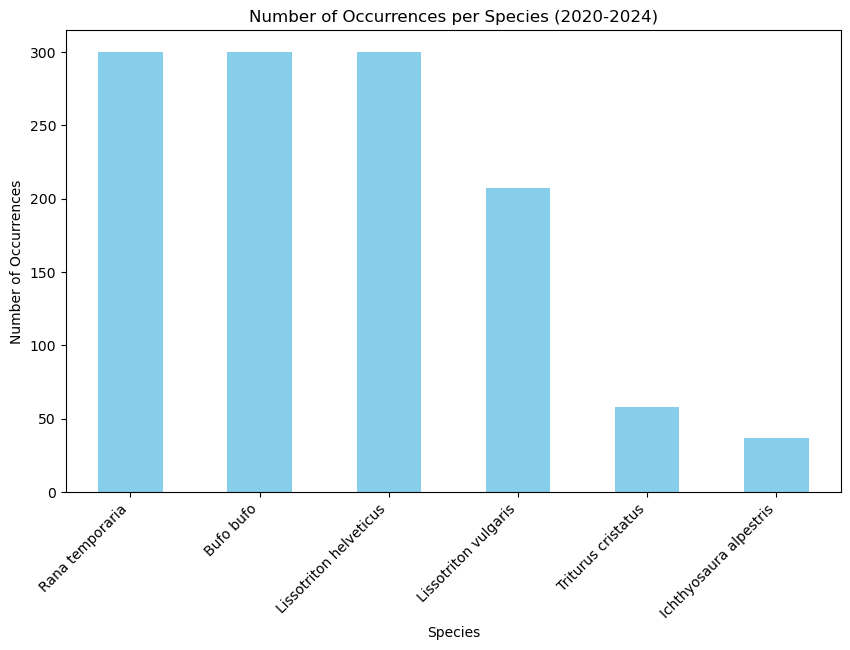

In [4]:
import matplotlib.pyplot as plt

# Count the number of occurrences for each species in the DataFrame
species_counts = df['species'].value_counts()

# Plot the data as a bar chart
plt.figure(figsize=(10, 6))
species_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Occurrences per Species (2020-2024)')
plt.xlabel('Species')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45, ha='right')
plt.show()

## 3. Considerations on Data Quality and Resolution

### 3.1 Data Quality Considerations:

**Coordinate Precision and Accuracy**: Occurrence records may vary in their coordinate precision. High-resolution data will have accurate and precise coordinates, while lower-quality data may have high coordinate uncertainty, making them less reliable for spatial analysis.

**Temporal Consistency**: Data should be filtered to include recent records (e.g., occurrences from 2020-2024) to ensure relevance to current habitat conditions (already done in previous stage).

**Data Completeness**: Presence/absence data can be supplemented by occurrence data through systematic sampling or modelling techniques, depending on the availability of true absence data.

**Data Sources and Verification**: Priority is given to verified and well-documented data sources such as GBIF. Records with high uncertainty or unverified sources may be excluded or flagged.

### 3.2 Understanding High-Resolution Data:

**Definition**: High-resolution data refers to records with precise spatial coordinates and minimal uncertainty, allowing for detailed spatial modelling.

**Application**: In habitat suitability modelling, high-resolution data leads to finer-scale predictions of habitat use and better identification of ecological barriers and corridors.

### 3.3 Checking Precision of Coordinates

To ensure high resolution throughout the dataset, we can check how many decimal places each coordinate has, which will indicate the resolution of the data. Ideally, we want to check if the coordinates are consistently using the same precision.

This can be done by inspecting a few records and checking the number of decimal places for `decimalLatitude` and `decimalLongitude`:

In [5]:
df['lat_precision'] = df['decimalLatitude'].apply(lambda x: len(str(x).split('.')[1]) if pd.notna(x) else 0)
df['lon_precision'] = df['decimalLongitude'].apply(lambda x: len(str(x).split('.')[1]) if pd.notna(x) else 0)

# Check unique values for precision
print(df['lat_precision'].unique())
print(df['lon_precision'].unique())

[5 6 4 3 1]
[5 6 4 3]


The results [5, 6, 4, 3, 1] for latitude precision and [5, 6, 4, 3] for longitude precision indicate that our data has varying levels of precision across different records. Specifically:

* **Latitude Precision** varies between data with 1 to 6 decimal places.
* **Longitude Precision** varies between data with 3 to 6 decimal places.
  
#### What This Means:
1. **Varying Precision**: Some coordinates are rounded to 1 decimal place (which could be very imprecise for spatial analysis), while others are more precise (6 decimal places).
2. **Impact on Analysis**: The data with lower precision (fewer decimal places) could lead to less accurate spatial analysis, as those coordinates are less specific.

### 3.4 Remove Low-Precision Data
We can remove records with less than 4 decimal places (corresponding to 10m resolution) to ensure that the records have high enough resolution. 

In [6]:
df = df[df['lat_precision'] >= 4]
df = df[df['lon_precision'] >= 4]
print(len(df))

1192


We can see that a total of 10 (the original 1202 minus the resulting 1192) records got deleted as they had a resolution lower than 10m. 

## 4. Spatially Checking the Records

### 4.1 Visualising the Records
We can now visualise the records to check that they are spatially consistent:


In [7]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Create geometries from the latitude and longitude
df['geometry'] = df.apply(lambda row: Point(row['decimalLongitude'], row['decimalLatitude']), axis=1)

# Convert the DataFrame to a GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry='geometry')

# Set the CRS (Coordinate Reference System) to EPSG:4326 (WGS 84)
gdf.set_crs('EPSG:4326', inplace=True)

,key,datasetKey,publishingOrgKey,installationKey,hostingOrganizationKey,publishingCountry,protocol,lastCrawled,lastParsed,crawlId,...,habitat,eventType,identificationRemarks,organismQuantity,organismRemarks,behavior,georeferenceVerificationStatus,lat_precision,lon_precision,geometry
0,4900356870,ce19985f-1b12-49c7-8859-8d664ef4a5b7,2884418b-373a-408d-8deb-d4fb7eb8aed6,99552c70-f762-11e1-a439-00145eb45e9a,07f617d0-c688-11d8-bf62-b8a03c50a862,GB,DWC_ARCHIVE,2024-11-14T09:04:43.971+00:00,2024-11-14T09:06:57.833+00:00,341,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,5,POINT (-4.49703 55.93262)
1,4900356428,ce19985f-1b12-49c7-8859-8d664ef4a5b7,2884418b-373a-408d-8deb-d4fb7eb8aed6,99552c70-f762-11e1-a439-00145eb45e9a,07f617d0-c688-11d8-bf62-b8a03c50a862,GB,DWC_ARCHIVE,2024-11-14T09:04:43.971+00:00,2024-11-14T09:06:57.703+00:00,341,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,5,POINT (-4.58219 56.01163)
2,4900356815,ce19985f-1b12-49c7-8859-8d664ef4a5b7,2884418b-373a-408d-8deb-d4fb7eb8aed6,99552c70-f762-11e1-a439-00145eb45e9a,07f617d0-c688-11d8-bf62-b8a03c50a862,GB,DWC_ARCHIVE,2024-11-14T09:04:43.971+00:00,2024-11-14T09:06:58.180+00:00,341,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,5,POINT (-4.56225 56.00771)
3,4867366492,583be0a0-006e-47af-82c2-d6e7d44b78c4,d4b5490a-3267-4e96-94b3-9b93ea167051,99552c70-f762-11e1-a439-00145eb45e9a,07f617d0-c688-11d8-bf62-b8a03c50a862,GB,DWC_ARCHIVE,2024-11-16T21:03:30.223+00:00,2024-11-16T21:05:08.167+00:00,49,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,5,POINT (-3.27479 55.94338)
4,4522812873,50c9509d-22c7-4a22-a47d-8c48425ef4a7,28eb1a3f-1c15-4a95-931a-4af90ecb574d,997448a8-f762-11e1-a439-00145eb45e9a,28eb1a3f-1c15-4a95-931a-4af90ecb574d,GB,DWC_ARCHIVE,2024-11-17T09:49:24.302+00:00,2024-11-19T02:33:58.117+00:00,499,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,6,POINT (-2.61708 54.90011)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1197,3056596617,4575bf91-0c65-47a8-84cb-0b36111f8956,3ce82624-d07f-4a56-88c8-a903321a90fc,99552c70-f762-11e1-a439-00145eb45e9a,07f617d0-c688-11d8-bf62-b8a03c50a862,GB,DWC_ARCHIVE,2024-10-23T22:14:45.471+00:00,2024-10-23T22:15:52.278+00:00,257,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,6,POINT (-3.18731 55.96800)
1198,3465789333,fd885591-9626-422d-ac3f-64f1ee347eca,3ce82624-d07f-4a56-88c8-a903321a90fc,99552c70-f762-11e1-a439-00145eb45e9a,07f617d0-c688-11d8-bf62-b8a03c50a862,GB,DWC_ARCHIVE,2024-11-13T09:48:45.486+00:00,2024-11-13T09:49:28.753+00:00,137,...,NaN,NaN,NaN,NaN,NaN,NaN,Accepted,6,6,POINT (-3.28000 55.94294)
1199,3056596473,4575bf91-0c65-47a8-84cb-0b36111f8956,3ce82624-d07f-4a56-88c8-a903321a90fc,99552c70-f762-11e1-a439-00145eb45e9a,07f617d0-c688-11d8-bf62-b8a03c50a862,GB,DWC_ARCHIVE,2024-10-23T22:14:45.471+00:00,2024-10-23T22:15:52.169+00:00,257,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,6,POINT (-3.29725 55.94105)
1200,4462935701,583be0a0-006e-47af-82c2-d6e7d44b78c4,d4b5490a-3267-4e96-94b3-9b93ea167051,99552c70-f762-11e1-a439-00145eb45e9a,07f617d0-c688-11d8-bf62-b8a03c50a862,GB,DWC_ARCHIVE,2024-11-16T21:03:30.223+00:00,2024-11-16T21:05:28.595+00:00,49,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,5,POINT (-3.16406 55.93882)


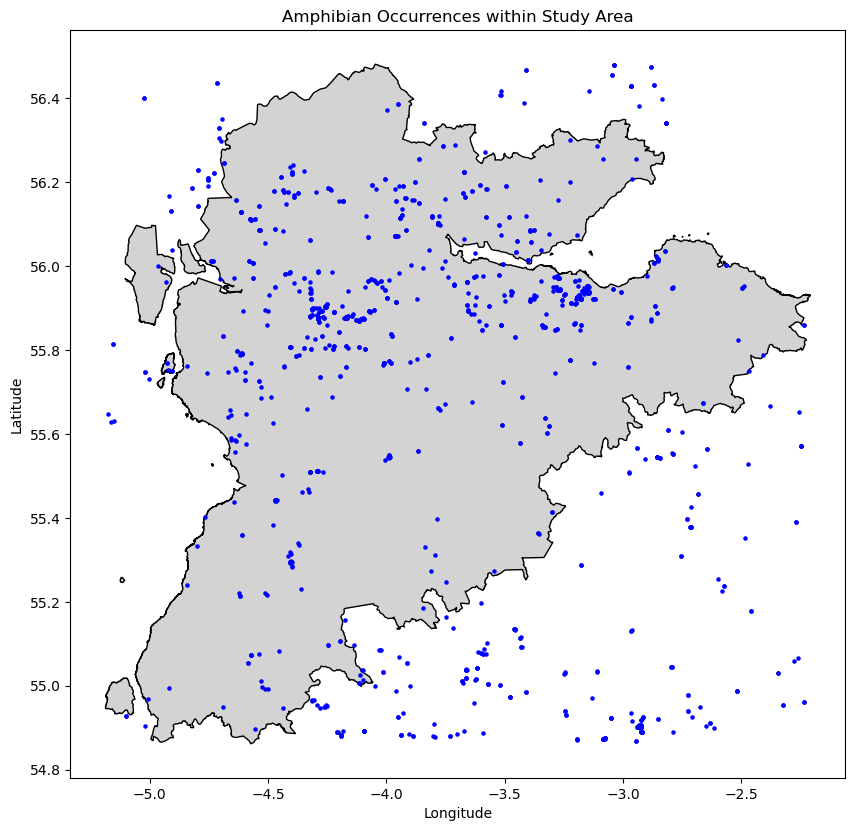

In [9]:
# Plot the study area first
ax = study_area.plot(color='lightgrey', edgecolor='black', figsize=(10, 10))

# Plot the occurrence data on top
gdf.plot(ax=ax, marker='o', color='blue', markersize=5)

# Optional: add title and labels
plt.title("Amphibian Occurrences within Study Area")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.show()

### 4.2 Spatially Filtering the Records

From the map above, we can see that despite the data being consistently distributed within the country boundaries, some of the data appears outside the study area. This is because when we filtered for the study area during the dataset retrieval phase, we were only able to filter by the study area bounding box. First, let's find out how many records are falling ouside the study area:

In [12]:
gdf['within_study_area'] = gdf.geometry.intersects(study_area.unary_union)

# Count occurrences outside the study area (where within_study_area is False)
outside_count = len(gdf[gdf['within_study_area'] == False])

# Display the count of occurrences outside the study area
print(f"Number of occurrences outside the study area: {outside_count}")

Number of occurrences outside the study area: 377


After verifying how many records are laying outside the area of interest, we can proceeed by deleting the latter from the dataset. The code below also visualises the dataset one more time to check that this process ran without issues.

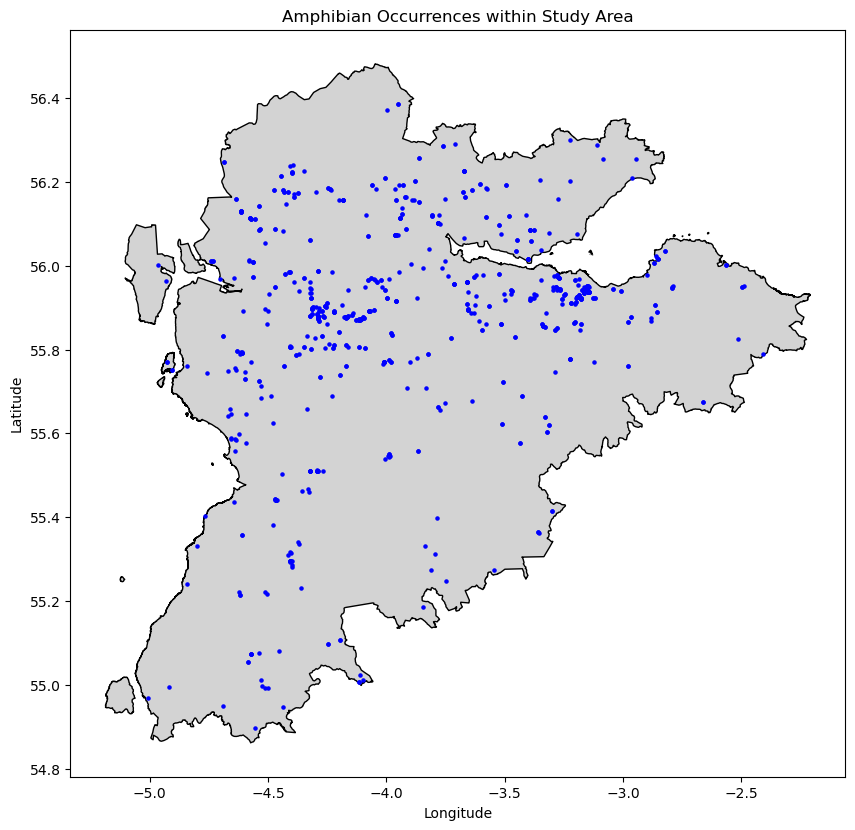

Remaining occurrences within the study area: 815


In [13]:
# Now filter out the occurrences that are outside the study area
gdf_filtered = gdf[gdf['within_study_area'] == True]

# Plot the filtered data on the map
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the study area
study_area.plot(ax=ax, color='lightgrey', edgecolor='black')

# Plot the filtered occurrence data points
gdf_filtered.plot(ax=ax, marker='o', color='blue', markersize=5)

# Optional: add title and labels
plt.title("Amphibian Occurrences within Study Area")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Show the plot
plt.show()

# Print how many records remain after filtering
print(f"Remaining occurrences within the study area: {len(gdf_filtered)}")

Let's check again the distribution of records per species:

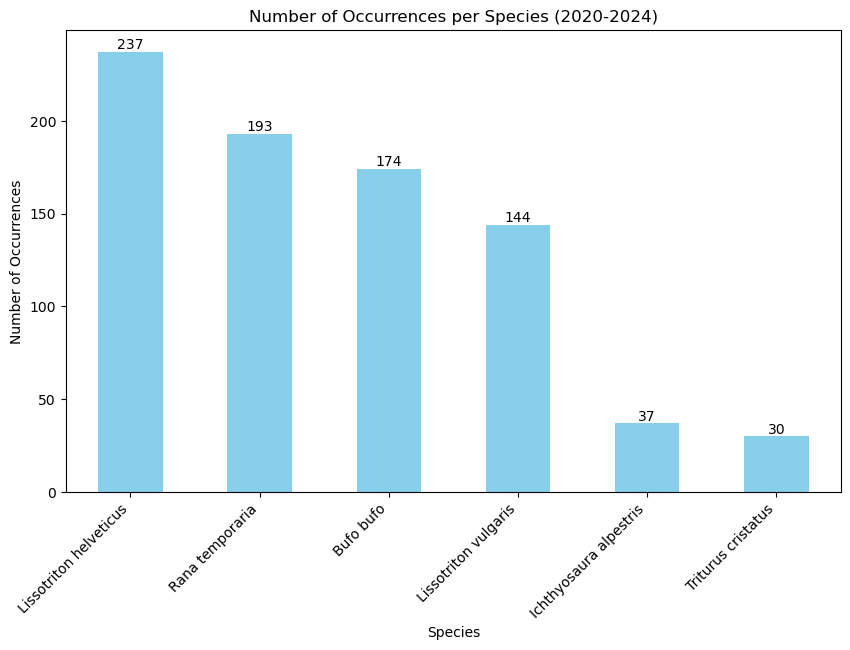

In [16]:
import matplotlib.pyplot as plt

# Count the number of occurrences for each species in the DataFrame
species_counts = gdf_filtered['species'].value_counts()

# Plot the data as a bar chart
plt.figure(figsize=(10, 6))
ax = species_counts.plot(kind='bar', color='skyblue')

# Add the count labels on top of the bars
for i, count in enumerate(species_counts):
    ax.text(i, count + 0.05, str(count), ha='center', va='bottom', fontsize=10)

# Set chart title and labels
plt.title('Number of Occurrences per Species (2020-2024)')
plt.xlabel('Species')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45, ha='right')

# Display the chart
plt.show()

____________________
___________________

This part is just saving the dataset created so far.

In [37]:
bufo_bufo = gdf_filtered[gdf_filtered['species'] == 'Bufo bufo']
rana_temporaria = gdf_filtered[gdf_filtered['species'] == 'Rana temporaria']
lissotriton_helveticus = gdf_filtered[gdf_filtered['species'] == 'Lissotriton helveticus']
print(len(bufo_bufo))
print(len(common_frog))
print(len(lissotriton_helveticus))

174
193
237


In [39]:
bufo_bufo.to_file('C:/GIS_Course/MScThesis-MaviSantarelli/data/OccurrenceData/BufoBufo/bufobufo.shp')  # Replace with your file path
common_frog.to_file('C:/GIS_Course/MScThesis-MaviSantarelli/data/OccurrenceData/RanaTemporaria/ranatemporaria.shp')  # Replace with your file path
lissotriton_helveticus.to_file('C:/GIS_Course/MScThesis-MaviSantarelli/data/OccurrenceData/LissotritonHelveticus/lissotritonhelveticus.shp')  # Replace with your file path

This part just saved the dataset created so far.
____________________________________
_________________

## Species Records Overview
For the initial modelling, presence data for three species of amphibians were collected from the **Global Biodiversity Information Facility (GBIF)**. The total number of records found for each species within the defined study area is as follows:

* Palmate Newt (Lissotriton helveticus): 237 records
* Common Frog (Rana temporaria): 193 records
* Common Toad (Bufo bufo): 174 records
  
While other sources have indicated higher observation numbers for Rana temporaria and Bufo bufo, GBIF data suggest that Lissotriton helveticus currently has the most records. For consistency, this study will use only GBIF data for all three species in the initial modelling phase. This decision ensures database uniformity, which is critical for reproducibility and data reliability.

### Why GBIF Data?
GBIF was chosen as the primary data source for the following reasons:

1. **Reputation**: GBIF is widely regarded as one of the most reputable biodiversity databases, providing rigorously managed, peer-reviewed, and globally aggregated data.
2. **Data Quality**: GBIF employs stringent quality control protocols, ensuring reliable and geo-referenced species observations.
3. **Global Standardization**: Using GBIF aligns with global biodiversity research standards, ensuring compatibility with other studies and datasets.

## 5. Generating Pseudo-Absence Data
In ecological studies, species distribution models often rely on the concept of presence and absence data to predict suitable habitats across a landscape. While presence data is collected from field surveys or other sources, absence data is not directly observed and must be generated. This is particularly challenging when dealing with species that have limited or unknown presence in certain areas.

**Pseudo-absence** data refers to artificially generated absence data for locations where the species is not observed. These data points are crucial for creating a balanced model, as the presence of a species in a given area is not always equal to the absence. Generating pseudo-absences involves sampling locations where the species is unlikely to be present based on its habitat preferences or other ecological considerations.

To avoid bias and maintain consistency, the following strategy was decided:

#### 1. Number of Pseudo-Absences:
Each species will be assigned 1000 pseudo-absence points across the study area.
This uniform approach simplifies the modelling process while maintaining a reasonable presence-to-pseudo-absence ratio (~1:5).

#### 2. Justification for 1000 Points:
A balanced dataset with 1000 pseudo-absences ensures sufficient spatial coverage without overwhelming the presence data.
Given the relatively low number of presence records for all three species, adding significantly more pseudo-absences could create imbalance and reduce model accuracy.

#### 3. Avoiding Sampling Bias:
To mitigate potential spatial biases in the dataset, pseudo-absences will be randomly distributed within the study area while excluding presence points.
Five independent pseudo-absence datasets will be generated for each species, following best practices in species distribution modeling.

#### 4. Future Steps for Evaluation
After the initial models are developed using the GBIF-based datasets, their accuracy and predictive performance will be evaluated. If the results indicate issues such as low accuracy or poor ecological relevance, additional steps will be taken:

 * **Incorporating Other Data Sources**: Species occurrence records from additional sources (e.g., local surveys or alternative databases) may be integrated to increase data reliability.
 * **Revising Pseudo-Absence Strategy**: Adjustments to the number or distribution of pseudo-absence points will be considered based on model diagnostics.
 * **Iterative Modeling**: The entire process will be repeated iteratively to refine the models and ensure their robustness.

### 5.1 Importing the Necessary Data

In [47]:
import geopandas as gpd
import numpy as np
import random

# Load the species presence data
species_files = {
    "Lissotriton_helveticus": "C:/GIS_Course/MScThesis-MaviSantarelli/data/OccurrenceData/LissotritonHelveticus/lissotritonhelveticus.shp",
    "Rana_temporaria": "C:/GIS_Course/MScThesis-MaviSantarelli/data/OccurrenceData/RanaTemporaria/ranatemporaria.shp",
    "Bufo_bufo": "C:/GIS_Course/MScThesis-MaviSantarelli/data/OccurrenceData/BufoBufo/bufobufo.shp"
}


study_area = gpd.read_file('C:/GIS_Course/MScThesis-MaviSantarelli/data/StudyArea/Study_Area.shp')  # Your study area shapefile

### 5.2  Define the Function to Generate Pseudo-Absences:
Now, let's define a function to generate pseudo-absences. Pseudo-absences are random points within the study area that are not part of the species’ presence records.

In [43]:
# Number of pseudo-absences to generate
pseudo_absence_count = 1000

# Create a function to generate random points within the study area
def generate_random_points(polygon, num_points):
    """
    Generate random points within a given polygon.
    
    Args:
        polygon: shapely.geometry.Polygon or MultiPolygon object.
        num_points: Number of random points to generate.

    Returns:
        List of shapely.geometry.Point objects.
    """
    min_x, min_y, max_x, max_y = polygon.bounds
    points = []
    while len(points) < num_points:
        random_point = Point(np.random.uniform(min_x, max_x), np.random.uniform(min_y, max_y))
        if polygon.contains(random_point):
            points.append(random_point)
    return points

Explanation of the code above:
* **Bounding Box**: First, we get the `bounding box` of the study area. This gives us the *minimum* and *maximum x* and *y* coordinates, which are used to generate random points.
* **Random Points**: We generate random points within the bounding box. These are *potential pseudo-absences*.
* **Inside Study Area**: We check whether each point lies inside the study area using the `contains()` method. This ensures that pseudo-absence points are within the boundaries of the study area.
* **GeoDataFrame**: Finally, we convert the list of random points into a `GeoDataFrame`.

### 5.3 Generate Pseudo-Absences for Each Species:

Now, we can generate pseudo-absences for each species. 

In [50]:
import os
output_folder = "C:/GIS_Course/MScThesis-MaviSantarelli/data/PseudoAbsences/"

# Generate pseudo-absences for each species
for species, file_path in species_files.items():
    # Load species presence data
    presence_data = gpd.read_file(file_path)

    # Reproject presence data to match the study area CRS
    presence_data = presence_data.to_crs(study_area.crs)
    
    # Exclude presence points from the study area
    study_area_excl_presence = study_area.overlay(
        presence_data, how="difference", keep_geom_type=True
    )
    
    # Generate random points for pseudo-absences
    random_points = generate_random_points(study_area_excl_presence.unary_union, pseudo_absence_count)
    
    # Create a GeoDataFrame for the pseudo-absence points
    pseudo_absence_gdf = gpd.GeoDataFrame(
        {
            "Species": [species] * pseudo_absence_count,
            "Presence": [0] * pseudo_absence_count  # 0 for absence
        },
        geometry=random_points,
        crs=study_area.crs
    )
    
    # Save the pseudo-absence GeoDataFrame as shapefile
    output_path = os.path.join(output_folder, f"{species}_pseudo_absences.shp")
    pseudo_absence_gdf.to_file(output_path, driver="ESRI Shapefile")
    print(f"Saved pseudo-absences for {species} at {output_path}")

Saved pseudo-absences for Lissotriton_helveticus at C:/GIS_Course/MScThesis-MaviSantarelli/data/PseudoAbsences/Lissotriton_helveticus_pseudo_absences.shp
Saved pseudo-absences for Rana_temporaria at C:/GIS_Course/MScThesis-MaviSantarelli/data/PseudoAbsences/Rana_temporaria_pseudo_absences.shp
Saved pseudo-absences for Bufo_bufo at C:/GIS_Course/MScThesis-MaviSantarelli/data/PseudoAbsences/Bufo_bufo_pseudo_absences.shp


The code above:

1. **Prepares Pseudo-Absence Data**:
    * Excludes areas with known presence records from the study area to avoid generating pseudo-absences in these locations.
    * Randomly generates points within the remaining area, ensuring unbiased distribution.
2. **Saves Data in Modeling-Friendly Format**:
    * Outputs separate shapefiles for each species, containing absence records (`Presence=0`), which can be used alongside presence data (`Presence=1`) in habitat suitability modeling.


## 6. Validate The Data
#### Objective:
Ensure the pseudo-absence points are well-distributed across the study area and do not overlap with presence points.

#### Justification: 
Poorly distributed pseudo-absences or overlaps with presence points can introduce bias into the species distribution models, reducing their predictive accuracy.

No overlaps detected for Lissotriton_helveticus.


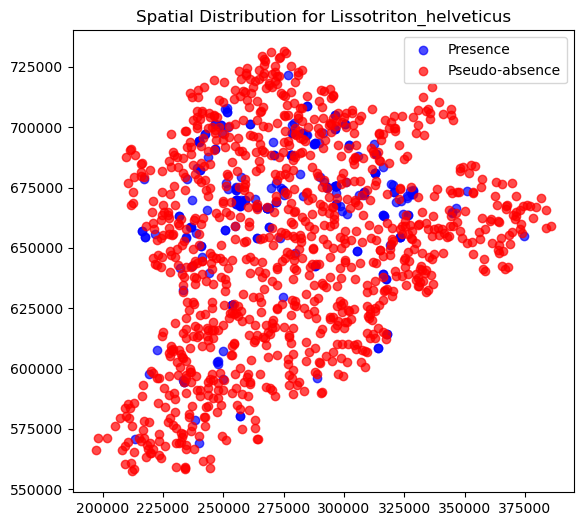

No overlaps detected for Rana_temporaria.


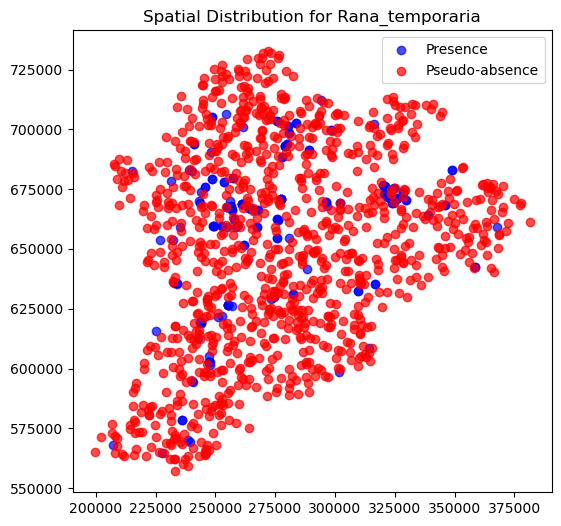

No overlaps detected for Bufo_bufo.


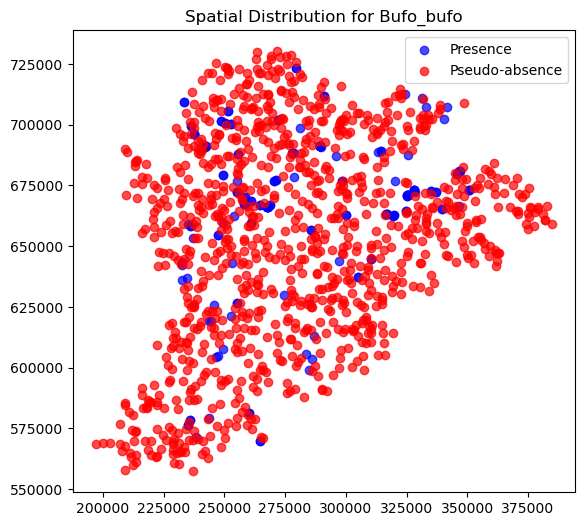

In [53]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Paths to the presence and pseudo-absence shapefiles
presence_files = {
    "Lissotriton_helveticus": "C:/GIS_Course/MScThesis-MaviSantarelli/data/OccurrenceData/LissotritonHelveticus/lissotritonhelveticus.shp",
    "Rana_temporaria": "C:/GIS_Course/MScThesis-MaviSantarelli/data/OccurrenceData/RanaTemporaria/ranatemporaria.shp",
    "Bufo_bufo": "C:/GIS_Course/MScThesis-MaviSantarelli/data/OccurrenceData/BufoBufo/bufobufo.shp"
}

pseudo_absence_files = {
    "Lissotriton_helveticus": "C:/GIS_Course/MScThesis-MaviSantarelli/data/PseudoAbsences/Lissotriton_helveticus_pseudo_absences.shp",
    "Rana_temporaria": "C:/GIS_Course/MScThesis-MaviSantarelli/data/PseudoAbsences/Rana_temporaria_pseudo_absences.shp",
    "Bufo_bufo": "C:/GIS_Course/MScThesis-MaviSantarelli/data/PseudoAbsences/Bufo_bufo_pseudo_absences.shp"
}

# CRS to use (e.g., EPSG:27700 or EPSG:4326)
target_crs = "EPSG:27700"  # British National Grid (you can change this based on your preference)

# Validate distribution and overlap for each species
for species in presence_files.keys():
    # Load presence and pseudo-absence data
    presence_data = gpd.read_file(presence_files[species])
    pseudo_absence_data = gpd.read_file(pseudo_absence_files[species])
    
    # Reproject both datasets to the target CRS
    presence_data = presence_data.to_crs(target_crs)
    pseudo_absence_data = pseudo_absence_data.to_crs(target_crs)
    
    # Check for overlaps
    overlaps = gpd.overlay(pseudo_absence_data, presence_data, how="intersection")
    if not overlaps.empty:
        print(f"Warning: Overlap detected between presence and pseudo-absence points for {species}.")
    else:
        print(f"No overlaps detected for {species}.")
    
    # Plot to visually inspect the spatial distribution
    ax = presence_data.plot(color="blue", label="Presence", alpha=0.7, figsize=(10, 6))
    pseudo_absence_data.plot(ax=ax, color="red", label="Pseudo-absence", alpha=0.7)
    plt.title(f"Spatial Distribution for {species}")
    plt.legend()
    plt.show()

In the code above: 

1. **Looping Through Species**: The loop iterates over the keys of the `presence_files dictionary` (i.e., each species name: Lissotriton_helveticus, Rana_temporaria, Bufo_bufo). For each species, it loads both the presence and pseudo-absence data using `gpd.read_file()`.

2. **Reprojecting Data to the Target CRS**: Both datasets are reprojected using `.to_crs(target_crs)` to ensure that they match the same spatial reference system (`EPSG:27700` in this case). This step is critical to avoid errors when performing spatial operations like overlays or plotting.

3. **Checking for Overlaps**: `gpd.overlay()` is used to check if any pseudo-absence points overlap with the presence points. The how="intersection" method finds areas where the two datasets intersect. If there are overlapping points, a warning message is printed to notify the user. If there are no overlaps, a confirmation message is printed.
#### Why check for overlaps?: 
Overlapping points can distort our model, as they would introduce bias by treating points as both "`presence`" and "`absence`". This step ensures that pseudo-absence points are truly absent from the species' recorded presence.

4. **Plotting the Data**: After checking for overlaps, the presence and pseudo-absence data are plotted:
Presence data is plotted in blue with some transparency (`alpha=0.7`).
Pseudo-absence data is plotted in red, also with transparency.
#### Why plot the data?:
Visualizing the spatial distribution of presence and pseudo-absence points allows you to quickly assess their spatial arrangement and whether the points seem well-distributed across the study area. This is important for ensuring that the pseudo-absence points do not overlap or concentrate inappropriately in specific regions, which could affect your model's accuracy.


## 7. Integrate the Data